In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
data=pd.read_csv("train.csv")

In [3]:
labels = data['label']
pixels = data.drop(columns=['label'])

In [4]:
X = pixels.values.reshape(-1, 28,28, 1)
X = X / 255.0

In [5]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(labels)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(X_train)

In [8]:
def display_img(atpos):
    img = np.array(train.iloc[atpos])
    reshaped_img = img.reshape(28,28)
    plt.imshow(reshaped_img, cmap='gray', interpolation='none')
    print(labels.iloc[atpos])

In [10]:
cnn = tf.keras.models.Sequential()

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu', input_shape=[28, 28, 1]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [16]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [17]:
cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

In [18]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
cnn.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=25,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.8580 - loss: 0.4633 - val_accuracy: 0.9787 - val_loss: 0.0726
Epoch 2/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9792 - loss: 0.0651 - val_accuracy: 0.9833 - val_loss: 0.0555
Epoch 3/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - accuracy: 0.9857 - loss: 0.0455 - val_accuracy: 0.9861 - val_loss: 0.0435
Epoch 4/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accuracy: 0.9895 - loss: 0.0320 - val_accuracy: 0.9865 - val_loss: 0.0410
Epoch 5/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9908 - loss: 0.0265 - val_accuracy: 0.9856 - val_loss: 0.0419
Epoch 6/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9942 - loss: 0.0173 - val_accuracy: 0.9861 - val_loss: 0.0464
Epoch 7/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9950 - loss: 0.0149 - val_accuracy: 0.9885 - val_loss: 0.0430
Epoch 8/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9961 -

In [20]:
predictions = cnn.predict(X_test)

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [21]:
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test, axis=1)  # If labels are one-hot encoded

In [22]:
predicted_classes

array([8, 1, 9, ..., 3, 0, 9])

In [23]:
actual_classes

array([8, 1, 9, ..., 3, 0, 9])

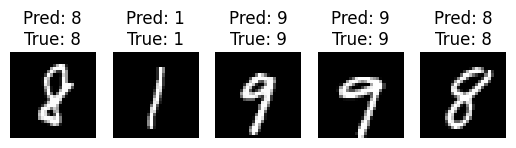

In [24]:
for i in range(5):
    plt.subplot(1, 5, i + 1)  # 1 row, 5 columns
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')  # Reshape if needed
    plt.title(f"Pred: {predicted_classes[i]}\nTrue: {actual_classes[i]}")
    plt.axis('off')

In [25]:
from sklearn.metrics import confusion_matrix
true_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(true_classes, predicted_classes)

In [78]:
cm

array([[  0, 810,   5,   0,   0,   0,   0,   0,   1,   0],
       [  0, 902,   4,   0,   1,   0,   0,   1,   1,   0],
       [  0,   6, 825,   0,   5,   0,   0,   8,   2,   0],
       [  0,   0,   3,   0,   0,   0,   0, 932,   2,   0],
       [  0,   8, 819,   0,   3,   0,   0,   3,   6,   0],
       [  0,   1,   6,   0,   1,   0,   0, 692,   2,   0],
       [  0, 777,   3,   0,   3,   0,   0,   2,   0,   0],
       [  0,   1,  14,   0,   0,   0,   0, 874,   4,   0],
       [  0,   1,  20,   0,   0,   0,   0, 784,  28,   2],
       [  0,   2,  18,   0,   1,   0,   0, 798,  18,   1]])

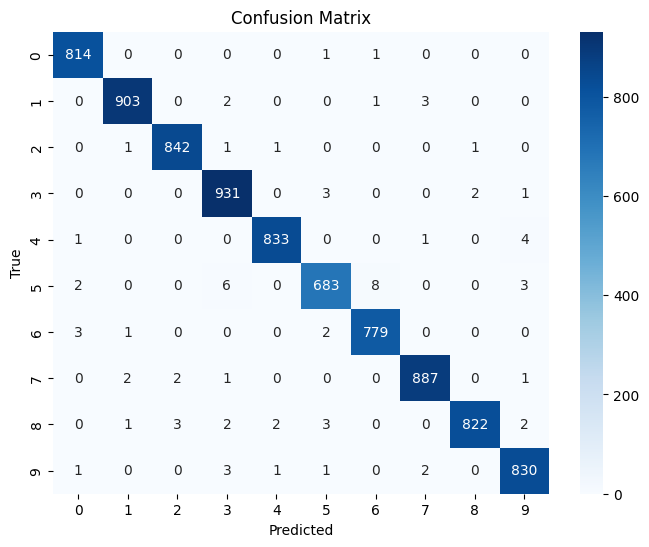

In [26]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()